In [105]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta, MO
from matplotlib import colors
import numpy as np

import ipywidgets as widgets
from IPython.display import display

In [106]:
# Connect to the Database 
conn=sqlite3.connect('BEMM459J_Group_21.db')

# conn is an object of the Connection class - the next command is only for display
print(type(conn))

# Enable foreign key for refential integrity
conn.execute("PRAGMA foreign_keys = 1")

# The connection object (conn) has access to various methods of the Connection class. 
# We are using the method cursor() and which returns a cursor object.
# The cursor object is essential to perform any operation on the database (CRUD operations).
cur=conn.cursor()

# The next command is only for display
print(type(cur))

<class 'sqlite3.Connection'>
<class 'sqlite3.Cursor'>


## Create tables

In [107]:
#creating Auditorium Table
createTblAuditorium = "CREATE TABLE Auditorium ( " + \
                  "Auditorium_id int NOT NULL, " + \
                  "Auditorium_name varchar(32) NOT NULL, " + \
                  "Location varchar(256) NOT NULL, " + \
                  "Seats_no int NOT NULL, " + \
                  "Num_screens int NOT NULL, " + \
                  "PRIMARY KEY (Auditorium_id) " + \
                   "); "


In [108]:
#creating User Table
createTblUser = "CREATE TABLE User ( " + \
                  "User_id INTEGER PRIMARY KEY AUTOINCREMENT, " + \
                  "Username varchar(32) NOT NULL, " + \
                  "Password varchar(100) NOT NULL " + \
                   "); "


In [109]:
#creating Movie Table
createTblMovie = "CREATE TABLE Movie ( " + \
                  "Movie_id int NOT NULL, " + \
                  "Title varchar(256) NOT NULL, " + \
                  "Director varchar(256) NOT NULL, " + \
                  "Cast varchar(256) NOT NULL, " + \
                  "Description text, " + \
                  "Movie_date date NOT NULL, " + \
                  "Duration_min int NOT NULL, " + \
                  "PRIMARY KEY (Movie_id) " + \
                   "); "


In [110]:
#creating Seat Table
createTblSeat = "CREATE TABLE Seat ( " + \
                  "Seat_id int NOT NULL, " + \
                  "Row int NOT NULL, " + \
                  "Number int NOT NULL, " + \
                  "Auditorium_id int NOT NULL, " + \
                  "PRIMARY KEY (Seat_id) " + \
                  "FOREIGN KEY(Auditorium_id) REFERENCES Auditorium(Auditorium_id) " + \
                   "); "


In [111]:

#creating Screening Table
createTblScreening = "CREATE TABLE Screening ( " + \
                  "Screening_id int NOT NULL, " + \
                  "Movie_id int NOT NULL, " + \
                  "Auditorium_id int NOT NULL, " + \
                  "Screening_start timestamp NOT NULL, " + \
                  "PRIMARY KEY (Screening_id), " + \
                  "UNIQUE(Screening_start), " + \
                  "UNIQUE(Auditorium_id), " + \
                  "FOREIGN KEY(Movie_id) REFERENCES Movie(Movie_id), " + \
                  "FOREIGN KEY(Auditorium_id) REFERENCES Auditorium(Auditorium_id) " + \
                   "); "


In [112]:

#creating Seat_reserved Table
createTblSeat_reserved = "CREATE TABLE Seat_reserved ( " + \
                  "Seat_reserved_id int NOT NULL, " + \
                  "Seat_id int NOT NULL, " + \
                  "Reservation_id int NOT NULL, " + \
                  "Screening_id int NOT NULL, " + \
                  "PRIMARY KEY (Seat_reserved_id), " + \
                  "FOREIGN KEY(Seat_id) REFERENCES Seat(Seat_id), " + \
                  "FOREIGN KEY(Reservation_id) REFERENCES Reservation(Reservation_id), " + \
                  "FOREIGN KEY(Screening_id) REFERENCES Screening(Screening_id) " + \
                   "); "


In [113]:
#creating Reservation Table

createTblReservation = "CREATE TABLE Reservation ( " + \
                  "Reservation_id int NOT NULL, " + \
                  "Screening_id int NOT NULL, " + \
                  "User_reserved_id int NOT NULL, " + \
                  "Auditorium_id int NOT NULL, " + \
                  "Reservation_date date NOT NULL, " + \
                  "Reservation_contact varchar(1024) NOT NULL, " + \
                  "Reserved bool, " + \
                  "Paid bool, " + \
                  "PRIMARY KEY (Reservation_id), " + \
                  "FOREIGN KEY(Screening_id) REFERENCES Screening(Screening_id), " + \
                  "FOREIGN KEY(User_reserved_id) REFERENCES User(User_id), " + \
                  "FOREIGN KEY(Auditorium_id) REFERENCES Auditorium(Auditorium_id) " + \
                   "); "


In [114]:
cur.execute(createTblAuditorium)
cur.execute(createTblUser)
cur.execute(createTblMovie)
cur.execute(createTblSeat)
cur.execute(createTblScreening)
cur.execute(createTblSeat_reserved)
cur.execute(createTblReservation)

## Tables created


In [115]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables
# call the function and pass connection object 
tables = tables_in_sqlite_db(conn)

#print tables in the current database
print(tables)

['Auditorium', 'User', 'Movie', 'Seat', 'Screening', 'Seat_reserved', 'Reservation']


## Pupulate database.

In [116]:
#inserting data into Auditorium 
insertAuditoriumStmt =  "INSERT INTO Auditorium (Auditorium_id, Auditorium_name, Location, Seats_no, Num_screens)"  + \
                    "VALUES (?, ?, ?, ?, ?)"

In [117]:
cur.execute(insertAuditoriumStmt, ("0001", "Vue", "Exeter",  "566", "2")) 
cur.execute(insertAuditoriumStmt, ("0002", "Odeon", "London", "677", "4")) 
cur.execute(insertAuditoriumStmt, ("0003", "Cineworld", "Glasgow", "325", "2")) 
cur.execute(insertAuditoriumStmt, ("0004", "Empire", "London", "430", "3"))  
cur.execute(insertAuditoriumStmt, ("0005", "Odeon", "Cornwall", "256", "2"))  
cur.execute(insertAuditoriumStmt, ("0006", "Arc", "Bristol", "590", "1"))  
cur.execute(insertAuditoriumStmt, ("0007", "Savoy", "Nottingham", "650", "3")) 
cur.execute(insertAuditoriumStmt, ("0008", "Vue", "Bristol", "425", "2")) 
cur.execute(insertAuditoriumStmt, ("0009", "Everyman", "Manchester","216", "1")) 
cur.execute(insertAuditoriumStmt, ("0010", "Tivoli", "Bath", "378", "2"))

In [127]:
#inserting data into user table using user input

username = input("Enter the username: ")
password = input("Enter the password: ")
qry="insert into User (Username, Password) values (?,?);"
try:
        cur.execute(qry, (username, password))
        conn.commit()
        print ('Records inserted successfully and committed')
except Exception as e:
        print ('Error in insert operation..rollback')
        print(e)
        conn.rollback()

Enter the username: Sanku
Enter the password: s
Records inserted successfully and committed


In [128]:
#inserting data into Movie 
insertMovieStmt =  "INSERT INTO Movie (Movie_id, Title, Director, Cast, Description, Movie_date, Duration_min)"  + \
                    "VALUES (?, ?, ?, ?, ?, ?, ?)"

In [129]:
cur.execute(insertMovieStmt, ("0001", "Cape", "Dustan", "Princ, Le, Aln, Parnik", "Sci-Fi", "2022-08-26", "130")) 
cur.execute(insertMovieStmt, ("0002", "Mission Impossible", "Christopher McQuarrie", "Tom Cruise, Peter Graves, Hayley Atwell, Rebecca Ferguson", "Action", "2022-08-12", "130")) 
cur.execute(insertMovieStmt, ("0003", "Spider-man: No Way Home", "Jon Watts", "Tom Holland, Tobey Maguire, Andrew Garfield, Zendaya, Benedict Cumberbatch", "Sci-Fi", "2022-08-12", "90")) 
cur.execute(insertMovieStmt, ("0004", "The French Dispatch", "Wes Anderson", "Benecio, Adrian, Tilda", "Comedy", "2022-08-26", "90")) 
cur.execute(insertMovieStmt, ("0005", "The Matrix", "Wachowski", "Keanu Reeves, Laurence, Carrie, Hugo", "Action", "2022-08-19", "150")) 
cur.execute(insertMovieStmt, ("0006", "The Conjuring", "James Wan", "Tom Holland, Hugo, Vera, Patrick", "Horror", "2022-07-29", "90")) 
cur.execute(insertMovieStmt, ("0007", "Hera-Pheri", "Priyadarshan", "Paresh Rawal, Sunil Shetty, Akshay Kumar", "Comedy", "2022-07-22", "150")) 
cur.execute(insertMovieStmt, ("0008", "Harry Potter and The Deathly Hallows: Part 2", "David Yates","Daniel Radcliffe, Emma Watson, Rupert Grint", "Fantasy", "2022-07-29", "130")) 
cur.execute(insertMovieStmt, ("0009", "Momento", "Christopher Nolan", "Guy Pearce, Carrie, Jo, Greg", "Thriller", "2022-08-12", "120")) 
cur.execute(insertMovieStmt, ("0010", "Inception", "Christopher Nolan", "Leonardo DiCaprio, Ken, Vera", "Sci-Fi", "2022-08-26", "120")) 

In [130]:
#inserting data into Seat 
insertSeatStmt =  "INSERT INTO Seat (Seat_id, Row, Number, Auditorium_id)"  + \
                    "VALUES (?, ?, ?, ?)"

In [131]:
cur.execute(insertSeatStmt, ("0001", "A", "5","0002")) 
cur.execute(insertSeatStmt, ("0002", "B", "4","0001")) 
cur.execute(insertSeatStmt, ("0003", "C", "3","0003")) 
cur.execute(insertSeatStmt, ("0004", "D", "2","0001")) 
cur.execute(insertSeatStmt, ("0005", "E", "1","0004")) 
cur.execute(insertSeatStmt, ("0006", "E", "6","0002")) 
cur.execute(insertSeatStmt, ("0007", "D", "4","0005")) 
cur.execute(insertSeatStmt, ("0008", "B", "5","0006")) 
cur.execute(insertSeatStmt, ("0009", "C", "2","0005")) 
cur.execute(insertSeatStmt, ("0010", "A", "3","0008")) 
cur.execute(insertSeatStmt, ("0011", "C", "4","0007")) 
cur.execute(insertSeatStmt, ("0012", "D", "6","0009")) 
cur.execute(insertSeatStmt, ("0013", "B", "7","0010")) 
cur.execute(insertSeatStmt, ("0014", "A", "2","0008")) 
cur.execute(insertSeatStmt, ("0015", "B", "3","0001")) 
cur.execute(insertSeatStmt, ("0016", "E", "4","0002")) 
cur.execute(insertSeatStmt, ("0017", "D", "5","0003")) 
cur.execute(insertSeatStmt, ("0018", "C", "3","0005")) 
cur.execute(insertSeatStmt, ("0019", "A", "6","0001")) 
cur.execute(insertSeatStmt, ("0020", "B", "4","0004")) 

In [132]:
#inserting data into Screening 
insertScreeningStmt =  "INSERT INTO Screening (Screening_id, Movie_id, Auditorium_id, Screening_start)"  + \
                    "VALUES (?, ?, ?, ?)"

In [133]:
cur.execute(insertScreeningStmt, ("0001", "0003", "0002", "12:00")) 
cur.execute(insertScreeningStmt, ("0002", "0002", "0001", "10:00")) 
cur.execute(insertScreeningStmt, ("0003", "0001", "0003", "09:15")) 
cur.execute(insertScreeningStmt, ("0004", "0004", "0004", "15:00")) 
cur.execute(insertScreeningStmt, ("0005", "0005", "0005", "11:00")) 
cur.execute(insertScreeningStmt, ("0006", "0006", "0006", "12:15")) 
cur.execute(insertScreeningStmt, ("0007", "0007", "0007", "12:30")) 
cur.execute(insertScreeningStmt, ("0008", "0008", "0008", "15:30")) 
cur.execute(insertScreeningStmt, ("0009", "0009", "0009", "10:10")) 
cur.execute(insertScreeningStmt, ("0010", "0010", "0010", "14:00")) 

In [134]:
#inserting data into Reservation 
insertReservationStmt =  "INSERT INTO Reservation (Reservation_id, Screening_id, User_reserved_id, Auditorium_id, Reservation_date, Reservation_contact, Reserved, Paid)"  + \
                    "VALUES (?, ?, ?, ?, ?, ?, ?, ?)"

In [135]:
cur.execute(insertReservationStmt, ("0001", "0001", "0001", "0002", "2022-07-17", "04644465678", "True", "True")) 
cur.execute(insertReservationStmt, ("0002", "0003", "0002", "0002", "2022-07-18", "04644462345", "True", "True")) 
cur.execute(insertReservationStmt, ("0003", "0002", "0003", "0001", "2022-07-23", "04644478965", "True", "True")) 
cur.execute(insertReservationStmt, ("0004", "0003", "0004", "0002", "2022-07-12", "04644414598", "True", "True")) 
cur.execute(insertReservationStmt, ("0005", "0001", "0005", "0002", "2022-07-11", "04644434598", "True", "True")) 
cur.execute(insertReservationStmt, ("0006", "0004", "0006", "0003", "2022-08-16", "04644485634", "True", "True")) 
cur.execute(insertReservationStmt, ("0007", "0005", "0007", "0004", "2022-08-19", "04644436508", "True", "True")) 
cur.execute(insertReservationStmt, ("0008", "0006", "0008", "0003", "2022-08-25", "04644406783", "True", "True")) 
cur.execute(insertReservationStmt, ("0009", "0007", "0009", "0005", "2022-08-22", "04644419485", "True", "True")) 
cur.execute(insertReservationStmt, ("0010", "0001", "0010", "0002", "2022-08-20", "04644410076", "True", "True")) 

In [136]:
#inserting data into Seat_reserved 
insertSeat_reservedStmt =  "INSERT INTO Seat_reserved (Seat_reserved_id, Seat_id, Reservation_id, Screening_id)"  + \
                    "VALUES (?, ?, ?, ?)"

In [137]:
cur.execute(insertSeat_reservedStmt, ("0001", "0001", "0001", "0001")) 
cur.execute(insertSeat_reservedStmt, ("0002", "0002", "0002", "0002")) 
cur.execute(insertSeat_reservedStmt, ("0003", "0003", "0003", "0003")) 
cur.execute(insertSeat_reservedStmt, ("0004", "0004", "0004", "0004")) 
cur.execute(insertSeat_reservedStmt, ("0005", "0005", "0005", "0005")) 
cur.execute(insertSeat_reservedStmt, ("0006", "0006", "0006", "0006")) 
cur.execute(insertSeat_reservedStmt, ("0007", "0007", "0007", "0007")) 
cur.execute(insertSeat_reservedStmt, ("0008", "0008", "0008", "0008")) 
cur.execute(insertSeat_reservedStmt, ("0009", "0009", "0009", "0009")) 
cur.execute(insertSeat_reservedStmt, ("0010", "0010", "0010", "0010")) 

## Viewing the data in tables

In [138]:
query_artists = "SELECT * FROM Auditorium"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 'Vue', 'Exeter', 566, 2)
(2, 'Odeon', 'London', 677, 4)
(3, 'Cineworld', 'Glasgow', 325, 2)
(4, 'Empire', 'London', 430, 3)
(5, 'Odeon', 'Cornwall', 256, 2)
(6, 'Arc', 'Bristol', 590, 1)
(7, 'Savoy', 'Nottingham', 650, 3)
(8, 'Vue', 'Bristol', 425, 2)
(9, 'Everyman', 'Manchester', 216, 1)
(10, 'Tivoli', 'Bath', 378, 2)


In [139]:
query_artists = "SELECT * FROM User"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 'ee', 'ee')
(2, 'Leo', 's')
(3, 'Alna', 's')
(4, 'Prince', 'd')
(5, 'Parnika', 'g')
(6, 'Diya', 'x')
(7, 'Amar', 'v')
(8, 'Elza', 'q')
(9, 'Deepak', 'e')
(10, 'Sanku', 's')


In [140]:
query_artists = "SELECT * FROM Movie"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 'Cape', 'Dustan', 'Princ, Le, Aln, Parnik', 'Sci-Fi', '2022-08-26', 130)
(2, 'Mission Impossible', 'Christopher McQuarrie', 'Tom Cruise, Peter Graves, Hayley Atwell, Rebecca Ferguson', 'Action', '2022-08-12', 130)
(3, 'Spider-man: No Way Home', 'Jon Watts', 'Tom Holland, Tobey Maguire, Andrew Garfield, Zendaya, Benedict Cumberbatch', 'Sci-Fi', '2022-08-12', 90)
(4, 'The French Dispatch', 'Wes Anderson', 'Benecio, Adrian, Tilda', 'Comedy', '2022-08-26', 90)
(5, 'The Matrix', 'Wachowski', 'Keanu Reeves, Laurence, Carrie, Hugo', 'Action', '2022-08-19', 150)
(6, 'The Conjuring', 'James Wan', 'Tom Holland, Hugo, Vera, Patrick', 'Horror', '2022-07-29', 90)
(7, 'Hera-Pheri', 'Priyadarshan', 'Paresh Rawal, Sunil Shetty, Akshay Kumar', 'Comedy', '2022-07-22', 150)
(8, 'Harry Potter and The Deathly Hallows: Part 2', 'David Yates', 'Daniel Radcliffe, Emma Watson, Rupert Grint', 'Fantasy', '2022-07-29', 130)
(9, 'Momento', 'Christopher Nolan', 'Guy Pearce, Carrie, Jo, Greg', 'Thriller', '2022-

In [141]:
query_artists = "SELECT * FROM Seat"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 'A', 5, 2)
(2, 'B', 4, 1)
(3, 'C', 3, 3)
(4, 'D', 2, 1)
(5, 'E', 1, 4)
(6, 'E', 6, 2)
(7, 'D', 4, 5)
(8, 'B', 5, 6)
(9, 'C', 2, 5)
(10, 'A', 3, 8)
(11, 'C', 4, 7)
(12, 'D', 6, 9)
(13, 'B', 7, 10)
(14, 'A', 2, 8)
(15, 'B', 3, 1)
(16, 'E', 4, 2)
(17, 'D', 5, 3)
(18, 'C', 3, 5)
(19, 'A', 6, 1)
(20, 'B', 4, 4)


In [142]:
query_artists = "SELECT * FROM Screening"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 3, 2, '12:00')
(2, 2, 1, '10:00')
(3, 1, 3, '09:15')
(4, 4, 4, '15:00')
(5, 5, 5, '11:00')
(6, 6, 6, '12:15')
(7, 7, 7, '12:30')
(8, 8, 8, '15:30')
(9, 9, 9, '10:10')
(10, 10, 10, '14:00')


In [143]:
query_artists = "SELECT * FROM Reservation"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 1, 1, 2, '2022-07-17', '04644465678', 'True', 'True')
(2, 3, 2, 2, '2022-07-18', '04644462345', 'True', 'True')
(3, 2, 3, 1, '2022-07-23', '04644478965', 'True', 'True')
(4, 3, 4, 2, '2022-07-12', '04644414598', 'True', 'True')
(5, 1, 5, 2, '2022-07-11', '04644434598', 'True', 'True')
(6, 4, 6, 3, '2022-08-16', '04644485634', 'True', 'True')
(7, 5, 7, 4, '2022-08-19', '04644436508', 'True', 'True')
(8, 6, 8, 3, '2022-08-25', '04644406783', 'True', 'True')
(9, 7, 9, 5, '2022-08-22', '04644419485', 'True', 'True')
(10, 1, 10, 2, '2022-08-20', '04644410076', 'True', 'True')


In [144]:
query_artists = "SELECT * FROM Seat_reserved"
cur.execute(query_artists)
rows = cur.fetchall()
for i in rows:
    print(i)

(1, 1, 1, 1)
(2, 2, 2, 2)
(3, 3, 3, 3)
(4, 4, 4, 4)
(5, 5, 5, 5)
(6, 6, 6, 6)
(7, 7, 7, 7)
(8, 8, 8, 8)
(9, 9, 9, 9)
(10, 10, 10, 10)


## Updating the records

In [145]:
#updating the records in Movie table
Movieupdatequery="update Movie set Title='Kwop' where Movie_id='0001'"
cur.execute(Movieupdatequery)
print("Updated Movie table successfully")

Updated Movie table successfully


## Deleting the records

In [146]:
#deleting a record in Reservation table
deleteReservationtquery = "DELETE FROM Seat_reserved WHERE Seat_reserved_id = 0001"
cur.execute(deleteReservationtquery)
print("Your Reservation has been cancelled")

Your Reservation has been cancelled


## Analytics and Visualisation

Dropdown(description='Year:', options=(2022, 2023, 2024), value=2022)

Dropdown(description='Month:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Button(description='Show plot', style=ButtonStyle())

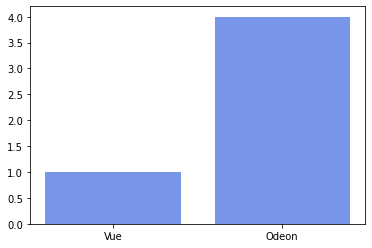

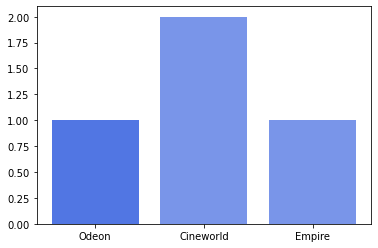

In [147]:
dropdown_year = widgets.Dropdown(
    options = [2022, 2023, 2024],
    description='Year:'
)

dropdown_month = widgets.Dropdown(
    options = range(1,13),
    description='Month:'
)

button_vis = widgets.Button(description="Show plot")
def on_button_vis_clicked(b):
    year = dropdown_year.value
    month = dropdown_month.value
    date1 = datetime.datetime(year, month, 1)
    date2 = date1 + relativedelta(months=1)
    
    
    #print(date1)
    #print(date2)
    query_num_book = "select count(*) as num_book, a.Auditorium_id, a.Auditorium_name "  + \
    "from Reservation rese, Auditorium a " + \
    "where rese.Auditorium_id = a.Auditorium_id and " + \
    "rese.Reservation_date >= ? and " + \
    "rese.Reservation_date < ? " + \
    "group by a.Auditorium_id"
     
    cur.execute(query_num_book, (date1.strftime("%Y-%m-%d"), date2.strftime("%Y-%m-%d")))
    res = cur.fetchall()
    df = pd.DataFrame(res, columns = ['num_book', 'Auditorium_id', 'Auditorium_name'])
    df.head()
    plt.bar(df['Auditorium_name'], df['num_book'], color='royalblue', alpha=0.7)
    plt.show()
    
button_vis.on_click(on_button_vis_clicked)
display(dropdown_year)
display(dropdown_month)
display(button_vis)

## MongoDB


In [196]:
#Importing MongoDB and Establishing the connection
import pymongo
mongoclient = pymongo.MongoClient("mongodb://localhost:27017/")
print(mongoclient.list_database_names())
print("done")

['admin', 'config']
done


In [197]:
#Defining a function  to list the names of the database
dblist=mongoclient.list_database_names()
for x in dblist:
    print(x)

admin
config


In [198]:
# Defining a user function to check if database exists - In MongoDB, a collection is not created until it gets content MongoDB waits until you have inserted a document before it actually creates the collection.
def check_DatabaseExists(argDBName):
    local_dblist = mongoclient.list_database_names()
    if argDBName in local_dblist:
        print("The database ", argDBName, " exists.")
    else:
        print("The database ", argDBName, " does not exist.")

#Defining a user function to check if a collection exists - In MongoDB, a collection is not created until it gets content. 
def check_CollectionExists(argDBName, argCollName, local_mydb):
    local_mydb = mongoclient[argDBName]
    local_collist = local_mydb.list_collection_names()
    if argCollName in local_collist:
        print("The collection ",  argCollName, "exists in database ", argDBName)
    else:
        print("The collection ", argCollName, " does not exist in database ", argDBName)

## Creating Database

In [199]:
#creating the database BEMM459J
mydb =mongoclient["BEMM459J"]
print(type(mydb))
print("done")

<class 'pymongo.database.Database'>
done


## Creating and Inserting data into collections

In [200]:
#Creating the collection for restaurant
restcol=mydb["restaurant"]
print(type(mydb))

<class 'pymongo.database.Database'>


In [201]:
#Inserting data into collection Restaurant
restcol=mydb["restaurant"]
data = [{"_id":100,"Name":"Turtle Bay", "Type":"caribbean", "Address":"Unit 14, Queen St, Exeter EX4 3HP","location":"Exeter"},
    {"_id":101,"Name":"Namaste", "Type":"Indian", "Address":"1 Guinea St, Exeter EX1 1BS","location":"Exeter"},
    {"_id":102,"Name":"Locanda Locatelli", "Type":"Italian", "Address":"8 Seymour St, London W1H 7JZ","location":"London"},
    {"_id":103,"Name":"Ox and Finch", "Type":"Scottish", "Address":"920 Sauchiehall St, Finnieston, Glasgow G3 7TF","location":"Glasgow"},
    {"_id":104,"Name":"Edie's Kitchen", "Type":"British", "Address":"10 Beach Rd, Carlyon Bay, Saint Austell PL25 3PH","location":"Cornwall"},
    {"_id":105,"Name":"Giggling Squid=Clifton", "Type":"Thai", "Address":"34 Princess Victoria St, Clifton, Bristol BS8 4BZ","location":"Bristol"},
    {"_id":106,"Name":"Pho", "Type":"Vietnamese", "Address":"24-32 Carlton St, Nottingham NG1 1NN","location":"Nottingham"},
    {"_id":107,"Name":"Duttons", "Type":"British", "Address":"2-10 Albert Square, Manchester M2 6LW","location":"Manchester"},
    {"_id":108,"Name":"Indian Temptation", "Type":"Indian", "Address":"9-10 High St, Bath BA1 5AQ","location":"Bath"},
    {"_id":109,"Name":"Orient London", "Type":"Chinese", "Address":" 15 Wardour St, London W1D 6PH","location":"London"}]
var = restcol.insert_many(data)
print(var.inserted_ids)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


In [202]:
# creating collection for taxi
taxicol = mydb["taxi"]
print(type(taxicol))

<class 'pymongo.collection.Collection'>


In [203]:
# inserting data into taxi
taxicol = mydb["taxi"]
data = [{"_id": 400, "name": "Waterloo Cars", "location": "london", "contact": [{"phonenumber": 2035389188, "officenumber": 1029384567}]},
    {"_id": 401, "name": "Glasgow Taxis", "location": "Glasgow", "contact": [{"phonenumber": 1414297070, "officenumber":8495847564}]},
    {"_id": 402, "name": "Miller's Taxis ", "location": "Cornwall", "contact": [{"phonenumber": 7873498349, "officenumber":4758693847}]},
    {"_id": 403, "name": "V CARS TAXIS", "location": "Bristol", "contact": [{"phonenumber": 1179252626, "officenumber": 8475856675}]},
    {"_id": 404, "name": "DG Cars", "location": "Nottingham", "contact": [{"phonenumber":1617407777, "officenumber": 4859886975}]},
    {"_id": 405, "name": "Max Cars", "location": "Manchester", "contact": [{"phonenumber": 1617407777, "officenumber": 95647756448}]},
    {"_id": 406, "name": "Bath Taxi Service", "location": "Bath", "contact": [{"phonenumber": 1225667247, "officenumber": 9576885745}]},
    {"_id": 407, "name": "Blackberry Cars", "location": "London", "contact": [{"phonenumber":2072543344, "officenumber": 12735546574}]},
    {"_id": 408, "name": "Apple Taxis", "location": "Exeter", "contact": [{"phonenumber": 1392666666, "officenumber": 1029384577}]}
    ]
var = taxicol.insert_many(data)
print(var.inserted_ids)

[400, 401, 402, 403, 404, 405, 406, 407, 408]


In [204]:
# creating collection for movies
moviecol = mydb["movies"]
print(type(moviecol))

<class 'pymongo.collection.Collection'>


In [205]:
# inserting data into taxi
moviecol = mydb["movies"]
data = [{"_id":500,"Auditorium":"Vue","Location":"Exeter","upcoming movies":["Killer of the Flower Moon","Amsterdam"]},
       {"_id":501,"Auditorium":"Odeon","Location":"London","upcoming movies":["Killer of the Flower Moon","Amsterdam","Northman"]},
       {"_id":502,"Auditorium":"Cineworld","Location":"Glasgow","upcoming movies":["Avatar 2","Vikram"]},
       {"_id":503,"Auditorium":"Empire","Location":"London","upcoming movies":["Starworld","Avatar 2","Malayankunju"]},
       {"_id":504,"Auditorium":"Odeon","Location":"Cornwall","upcoming movies":["Love and THunder","Amsterdam"]},
       {"_id":505,"Auditorium":"Arc","Location":"Bristol","upcoming movies":["Killer of the Flower Moon","Tenet"]},
       {"_id":506,"Auditorium":"Savoy","Location":"Nottingham","upcoming movies":["The Hunt","Amsterdam"]},
       {"_id":507,"Auditorium":"Vue","Location":"Bristol","upcoming movies":["Killer of the Flower Moon","Avatar 2","Dear Friend"]},
       {"_id":508,"Auditorium":"Everyman","Location":"Manchester","upcoming movies":["Killer of the Flower Moon","Hridayam","RRR"]},
       {"_id":509,"Auditorium":"Tivoli","Location":"Bath","upcoming movies":["Killer of the Flower Moon","Pushpa","Dear Friend"]}
       ]
var = moviecol.insert_many(data)
print(var.inserted_ids)

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]


## Displaying

In [206]:
# display all the collections
collist = mydb.list_collection_names()
for x in collist:
    print(x) 

movies
taxi
restaurant


In [207]:
# display the records in hotel collection
result = restcol.find()
for x in result:
    print(x)

{'_id': 100, 'Name': 'Turtle Bay', 'Type': 'caribbean', 'Address': 'Unit 14, Queen St, Exeter EX4 3HP', 'location': 'Exeter'}
{'_id': 101, 'Name': 'Namaste', 'Type': 'Indian', 'Address': '1 Guinea St, Exeter EX1 1BS', 'location': 'Exeter'}
{'_id': 102, 'Name': 'Locanda Locatelli', 'Type': 'Italian', 'Address': '8 Seymour St, London W1H 7JZ', 'location': 'London'}
{'_id': 103, 'Name': 'Ox and Finch', 'Type': 'Scottish', 'Address': '920 Sauchiehall St, Finnieston, Glasgow G3 7TF', 'location': 'Glasgow'}
{'_id': 104, 'Name': "Edie's Kitchen", 'Type': 'British', 'Address': '10 Beach Rd, Carlyon Bay, Saint Austell PL25 3PH', 'location': 'Cornwall'}
{'_id': 105, 'Name': 'Giggling Squid=Clifton', 'Type': 'Thai', 'Address': '34 Princess Victoria St, Clifton, Bristol BS8 4BZ', 'location': 'Bristol'}
{'_id': 106, 'Name': 'Pho', 'Type': 'Vietnamese', 'Address': '24-32 Carlton St, Nottingham NG1 1NN', 'location': 'Nottingham'}
{'_id': 107, 'Name': 'Duttons', 'Type': 'British', 'Address': '2-10 Alb

In [208]:
# display the records in taxi collection
result = taxicol.find()
for x in result:
    print(x)

{'_id': 400, 'name': 'Waterloo Cars', 'location': 'london', 'contact': [{'phonenumber': 2035389188, 'officenumber': 1029384567}]}
{'_id': 401, 'name': 'Glasgow Taxis', 'location': 'Glasgow', 'contact': [{'phonenumber': 1414297070, 'officenumber': 8495847564}]}
{'_id': 402, 'name': "Miller's Taxis ", 'location': 'Cornwall', 'contact': [{'phonenumber': 7873498349, 'officenumber': 4758693847}]}
{'_id': 403, 'name': 'V CARS TAXIS', 'location': 'Bristol', 'contact': [{'phonenumber': 1179252626, 'officenumber': 8475856675}]}
{'_id': 404, 'name': 'DG Cars', 'location': 'Nottingham', 'contact': [{'phonenumber': 1617407777, 'officenumber': 4859886975}]}
{'_id': 405, 'name': 'Max Cars', 'location': 'Manchester', 'contact': [{'phonenumber': 1617407777, 'officenumber': 95647756448}]}
{'_id': 406, 'name': 'Bath Taxi Service', 'location': 'Bath', 'contact': [{'phonenumber': 1225667247, 'officenumber': 9576885745}]}
{'_id': 407, 'name': 'Blackberry Cars', 'location': 'London', 'contact': [{'phonenumb

In [209]:
# display the upcoming Movies in Movie collection
result = moviecol.find()
for x in result:
    print(x)

{'_id': 500, 'Auditorium': 'Vue', 'Location': 'Exeter', 'upcoming movies': ['Killer of the Flower Moon', 'Amsterdam']}
{'_id': 501, 'Auditorium': 'Odeon', 'Location': 'London', 'upcoming movies': ['Killer of the Flower Moon', 'Amsterdam', 'Northman']}
{'_id': 502, 'Auditorium': 'Cineworld', 'Location': 'Glasgow', 'upcoming movies': ['Avatar 2', 'Vikram']}
{'_id': 503, 'Auditorium': 'Empire', 'Location': 'London', 'upcoming movies': ['Starworld', 'Avatar 2', 'Malayankunju']}
{'_id': 504, 'Auditorium': 'Odeon', 'Location': 'Cornwall', 'upcoming movies': ['Love and THunder', 'Amsterdam']}
{'_id': 505, 'Auditorium': 'Arc', 'Location': 'Bristol', 'upcoming movies': ['Killer of the Flower Moon', 'Tenet']}
{'_id': 506, 'Auditorium': 'Savoy', 'Location': 'Nottingham', 'upcoming movies': ['The Hunt', 'Amsterdam']}
{'_id': 507, 'Auditorium': 'Vue', 'Location': 'Bristol', 'upcoming movies': ['Killer of the Flower Moon', 'Avatar 2', 'Dear Friend']}
{'_id': 508, 'Auditorium': 'Everyman', 'Location'

## Linking SQL and NoSQL

In [210]:
#Using the AuditoriumID to get the details of the auditorium 
AuditoriumID = input("Enter the Auditorium_id: " )

Enter the Auditorium_id: 004


In [211]:
# finding the Location for the given reservationID
query = "select Location from Auditorium where Auditorium_id = '{}'".format(AuditoriumID)
cur.execute(query)
rows=cur.fetchone()
print("The Location for the given auditorium is {}".format(rows[0]))

The Location for the given auditorium is London


In [212]:
# Getting Restaurant recommendations for the given Location
result = restcol.find({"location": rows[0]})
print("Restaurant recommendations for {}".format(rows[0]))
for x in result:
    print(x)

Restaurant recommendations for London
{'_id': 102, 'Name': 'Locanda Locatelli', 'Type': 'Italian', 'Address': '8 Seymour St, London W1H 7JZ', 'location': 'London'}
{'_id': 109, 'Name': 'Orient London', 'Type': 'Chinese', 'Address': ' 15 Wardour St, London W1D 6PH', 'location': 'London'}


In [213]:
# Getting taxi recommendations for the given Location
result = taxicol.find({"location": rows[0]})
print("Taxi recommendations for {}".format(rows[0]))
for x in result:
    print(x)

Taxi recommendations for London
{'_id': 407, 'name': 'Blackberry Cars', 'location': 'London', 'contact': [{'phonenumber': 2072543344, 'officenumber': 12735546574}]}


In [214]:
# Getting Upcoming Movies for the given Auditorium 
result = moviecol.find({"Location": rows[0]})
print("Upcoming Movies for {}".format(rows[0]))
for x in result:
    print(x)

Upcoming Movies for London
{'_id': 501, 'Auditorium': 'Odeon', 'Location': 'London', 'upcoming movies': ['Killer of the Flower Moon', 'Amsterdam', 'Northman']}
{'_id': 503, 'Auditorium': 'Empire', 'Location': 'London', 'upcoming movies': ['Starworld', 'Avatar 2', 'Malayankunju']}


## Dropping collections

In [ ]:
# drop restaurant collection
restcol.drop()
print("Successfully dropped restaurant collection")
#Check if the collection exists by calling the user function defined earlier
check_CollectionExists("BEMM459J", "restaurant", mydb)

In [ ]:
#drop taxi collection
taxicol.drop()
print("Successfully dropped taxi collection")
#Check if the collection exists by calling the user function defined earlier
check_CollectionExists("BEMM459J", "taxi", mydb)

In [ ]:
#drop movies collection
moviecol.drop()
print("Successfully dropped movie collection")
#Check if the collection exists by calling the user function defined earlier
check_CollectionExists("BEMM459J", "movie", mydb)

In [ ]:
#Drop database using instance of MongoCLient
mongoclient.drop_database("BEMM459J")
#Check to see if database exists by calling the user function defined earlier 
check_DatabaseExists("BEMM459J")